In [1]:
from qiskit import ClassicalRegister
import numpy as np

from qiskit.quantum_info.states.random import random_statevector
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Sampler, Estimator
from qiskit.visualization import plot_histogram

        

In [2]:

def u_a2(power):
    """
    U|y> = |y2^power mod 7>
    """
    u = QuantumCircuit(3)
    for iteration in range(power):
        u.swap(0, 1)
        u.swap(1, 2)
    u = u.to_gate()
    u.name = "2^%i mod 7" % power

    return u.control()


def create_bell_circuit():
    bell_circuit = QuantumCircuit(2, name='bell')
    bell_circuit.h(0)
    bell_circuit.cx(0, 1)
    return bell_circuit


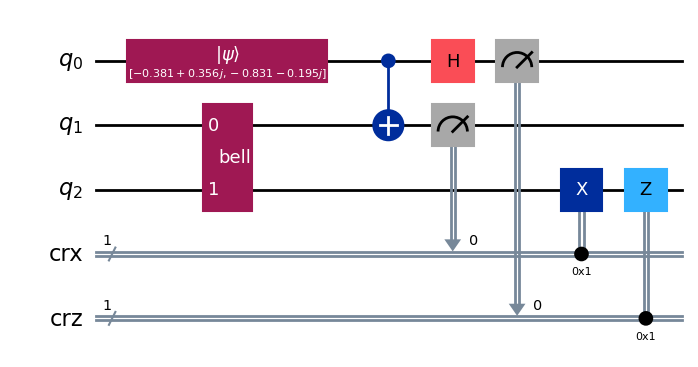

In [3]:
qr = QuantumRegister(3, 'q')
crx = ClassicalRegister(1, 'crx')
crz = ClassicalRegister(1, 'crz')
qc = QuantumCircuit(qr, crx, crz)
# Use to initialize qubit psi di Alice
psi = random_statevector(2).data
qc.initialize(psi, qr[0])
qc.draw()
qc.append(create_bell_circuit(), [qr[1], qr[2]])
qc.draw()
# show composed circuits
qc.decompose().draw()

qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.draw()

qc.measure(qr[0], crz)
qc.measure(qr[1], crx)
qc.draw()

qc.x(qr[2]).c_if(crx, 1)
qc.z(qr[2]).c_if(crz, 1)
qc.draw('mpl')

# TODO: use sampler
# initialize sampler


# print statevector
#Statevector(qc_dm)

Show matrix representation of the circuit

In [68]:
from qiskit.circuit.library import CXGate, HGate

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
Operator(CXGate())
Operator(HGate())
XX

KeyboardInterrupt: 

In [77]:
circ = QuantumCircuit(2)
circ.h(0)

a = Operator(circ)
a.data
a.dim

(4, 4)

Using Operators in circuits
Unitary Operators can be directly inserted into a QuantumCircuit using the QuantumCircuit.append method. This converts the Operator into a UnitaryGate object, which is added to the circuit.

If the operator is not unitary, an exception will be raised. This can be checked using the Operator.is_unitary() function, which will return True if the operator is unitary and False otherwise.


In [83]:
# Create an operator
 
# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
#circ.draw('mpl')
circ.draw()

┌──────────┐┌─┐   
q_0: ┤0         ├┤M├───
     │  Unitary │└╥┘┌─┐
q_1: ┤1         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  0  1

In [84]:
import qiskit.qasm2
program = '''
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    creg c[2];
 
    h q[0];
    cx q[0], q[1];
 
    measure q -> c;
'''
circuit = qiskit.qasm2.loads(program)
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

{0: 0.25, 1: 0.244, 2: 0.251, 3: 0.255}


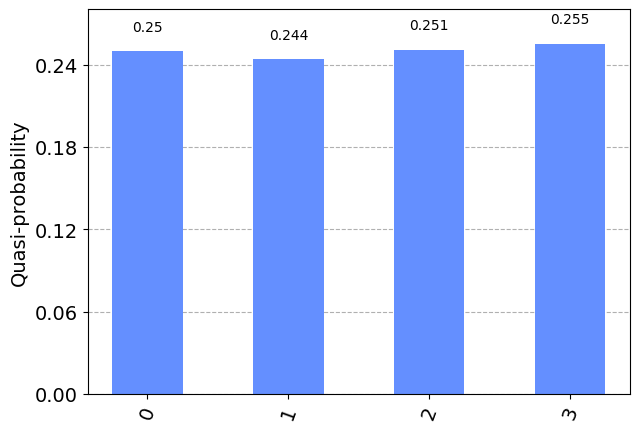

In [15]:
"""
verifichiamo che spostando la misurazione in fondo, e controllando x e z con bit quantistico, il risultato sia uguale
"""
qr_dm = QuantumRegister(3, 'q')
crx_dm = ClassicalRegister(1, 'crx')
crz_dm = ClassicalRegister(1, 'crz')
qc_dm = QuantumCircuit(qr_dm, crx_dm, crz_dm)
qc_dm.initialize(psi, qr[0])
qc_dm.append(create_bell_circuit(), [qr[1], qr[2]])
qc_dm.cx(qr[0], qr[1])
qc_dm.h(qr[0])

# sposto misurazioni e x,z diventano cx e cz
qc_dm.cx(qr[0], qr[2])
qc_dm.cz(qr[1], qr[2])
qc_dm.measure(qr[0], crz_dm)
qc_dm.measure(qr[1], crx_dm)
qc_dm.draw()

# TODO: use sampler
sampler = Sampler()
counts = sampler.run(
    qc_dm,
    #shots=None
    shots=1000
).result().quasi_dists[0]
print(counts)

plot_histogram(counts)




In [16]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()
 
# Current
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Operator
result = Operator(qc).data
result

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5+0.j,
        -0.5+0.j, -0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
        -0.5+0.j,  0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0.5+0.j,
         0.5+0.j,  0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,
         0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j,  0. +0.j,  0. +0.j,
         0. +0.j,  0. +0.j]])

In [18]:
 
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()

# Current
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
statevector

Statevector([0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0.5+0.j],
            dims=(2, 2, 2))


In [18]:
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1, 5))
qc.measure_all()